<h1 style="color:blue"> Bayesian Statistics and Probabilistic Programming</h1>

<h1 style="color:blue"> Spring 2024 - Homework 01</h1>

<h3 style="color:blue">2024-03-25</h3>

<h1 style="color:blue">Contributors</h1>

### Adriana Alvaro Email: aalvarma106@alumnes.ub.edu
### Madison Chester Email: mchestch7@alumnes.ub.edu
### Dafni Tziakouri Email: dtziaktz7@alumnes.ub.edu
### Arturo Fredes Email: afredeca7@alumnes.ub.edu

<h1 style="color:blue">Exercises</h1>

## Exercise 1: Placenta previa

This exercise pertains to what we studied in `Binomial.3.Placenta.previa.pub.ipynb`.

1. Compute the posterior pdf, and both prior and posterior predictor pmf for the placenta previa problem, using a conjugate $\textrm{Beta}(\alpha,\beta)$ prior, for several values of the parameters, obtaining for each of them a 95% (centered) credible interval and the MAP and posterior expectation estimators of $\theta$. In particular, reproduce Figure 2.3 and Table 2.1 in BDA3 [1]. Do the same for those $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. Compare the posterior quantities with both priors. 

2. Simulate the prior predictive pmf with the nonconjugate piecewise linear pdf. Do it in both possible ways: (1) Sample from $h$ by the inverse transformation method and (2) Sample from its discretization. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$. 

3. Simulate the posterior predictive pmf (given the observed data of 437 female births from 980 placenta previa births) with the nonconjugate piecewise linear pdf. Sample from the the discretization of the posterior pdf as in Exercise 1. Summarize the resulting simulated sample: plot the empirical pmf, compute median, mode, expectation, standard deviation. Compare the results with those obtained from the conjugate prior $\textrm{Beta}(\alpha_0,\beta_0)$.

[1] _Bayesian Data Analysis - Third edition_ **(BDA3),** pag. 37.

## Exercise 1.1

Since we're dealing with a Bernoulli trial (success or failure), the likelihood function is given by the binomial probability mass function:
$$
    f(x|\theta)=\theta^{x}\cdot(1-\theta)^{(n-x)}
$$

Where,
- x is the number of successes (placenta previa cases),

- n is the total number of trials (total pregnancies),

- θ is the probability of success (the parameter we want to estimate).


We'll use a Beta distribution as the prior, which is conjugate to the binomial likelihood function. The Beta distribution has two shape parameters, α and β:
$$
\text{Prior}(\theta \mid \alpha, \beta) = \frac{\theta^{\alpha - 1} \cdot (1 - \theta)^{\beta - 1}}{B(\alpha, \beta)}
$$

Where,
- B(α,β) is the Beta function, serving as the normalizing constant.


Using Bayes' theorem, we can compute the posterior distribution, which is also a Beta distribution with updated parameters.
$$
\text{Posterior}(\theta \mid x, n, \alpha, \beta) \propto \text{Lik}(\theta \mid x, n) \times \text{Prior}(\theta \mid \alpha, \beta)
$$

$$
\text{Posterior}(\theta \mid x, n, \alpha, \beta) = \frac{\theta^{\alpha+x-1} \cdot (1-\theta)^{\beta+n-x-1}}{B(\alpha+x, \beta+n-x)}
$$


In [1]:
# Given data
n <- 980
x <- 437

$ p_{\text{MAP}} = \frac{x + \alpha - 1}{n + \alpha + \beta - 2}$

In [38]:
# Function to compute the Beta posterior parameters and quantities
compute_beta_posterior <- function(alpha, beta, x, n) {
  # Compute posterior parameters
  alpha_post <- alpha + x
  beta_post <- beta + n - x
  
  # Compute 95% centered credible interval
  credible_interval <- qbeta(c(0.025, 0.975), alpha_post, beta_post)
  
  # Compute MAP estimator
  map_estimator <- (x + alpha - 1) / (n + alpha + beta - 2)
  
  # Compute posterior expectation estimator
  posterior_expectation <- alpha_post / (alpha_post + beta_post)
  
  return(list(alpha_post = alpha_post, beta_post = beta_post, credible_interval = credible_interval,
              map_estimator = map_estimator, posterior_expectation = posterior_expectation))
}

In [39]:
# Define several values of alpha and beta for the Beta prior
alpha_values <- c(0.5, 1, 2, 5, 10)
beta_values <- c(0.5, 1, 2, 5, 10)

# Initialize lists to store results
results <- list()

# Compute posterior for each combination of alpha and beta
for (alpha in alpha_values) {
  for (beta in beta_values) {
    # Compute posterior parameters and quantities
    result <- compute_beta_posterior(alpha, beta, x, n)
    # Store results
    results[[paste("alpha", alpha, "beta", beta)]] <- result
  }
}

# Print results
for (key in names(results)) {
  alpha_beta <- unlist(strsplit(key, " "))
  alpha <- alpha_beta[2]
  beta <- alpha_beta[4]
  cat("Alpha:", alpha, "- Beta:", beta, "\n")
  cat("Posterior parameters (alpha_post, beta_post):", results[[key]]$alpha_post, ",", results[[key]]$beta_post, "\n")
  cat("95% Credible Interval:", results[[key]]$credible_interval, "\n")
  cat("MAP Estimator:", results[[key]]$map_estimator, "\n")
  cat("Posterior Expectation Estimator:", results[[key]]$posterior_expectation, "\n")
  cat("\n")
}



Alpha: 0.5 - Beta: 0.5 
Posterior parameters (alpha_post, beta_post): 437.5 , 543.5 
95% Credible Interval: 0.4149953 0.4771604 
MAP Estimator: 0.4458631 
Posterior Expectation Estimator: 0.4459735 

Alpha: 0.5 - Beta: 1 
Posterior parameters (alpha_post, beta_post): 437.5 , 544 
95% Credible Interval: 0.4147779 0.4769241 
MAP Estimator: 0.4456355 
Posterior Expectation Estimator: 0.4457463 

Alpha: 0.5 - Beta: 2 
Posterior parameters (alpha_post, beta_post): 437.5 , 545 
95% Credible Interval: 0.4143439 0.4764523 
MAP Estimator: 0.445181 
Posterior Expectation Estimator: 0.4452926 

Alpha: 0.5 - Beta: 5 
Posterior parameters (alpha_post, beta_post): 437.5 , 548 
95% Credible Interval: 0.4130473 0.4750424 
MAP Estimator: 0.4438231 
Posterior Expectation Estimator: 0.4439371 

Alpha: 0.5 - Beta: 10 
Posterior parameters (alpha_post, beta_post): 437.5 , 553 
95% Credible Interval: 0.4109044 0.4727109 
MAP Estimator: 0.4415781 
Posterior Expectation Estimator: 0.4416961 

Alpha: 1 - Beta:

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

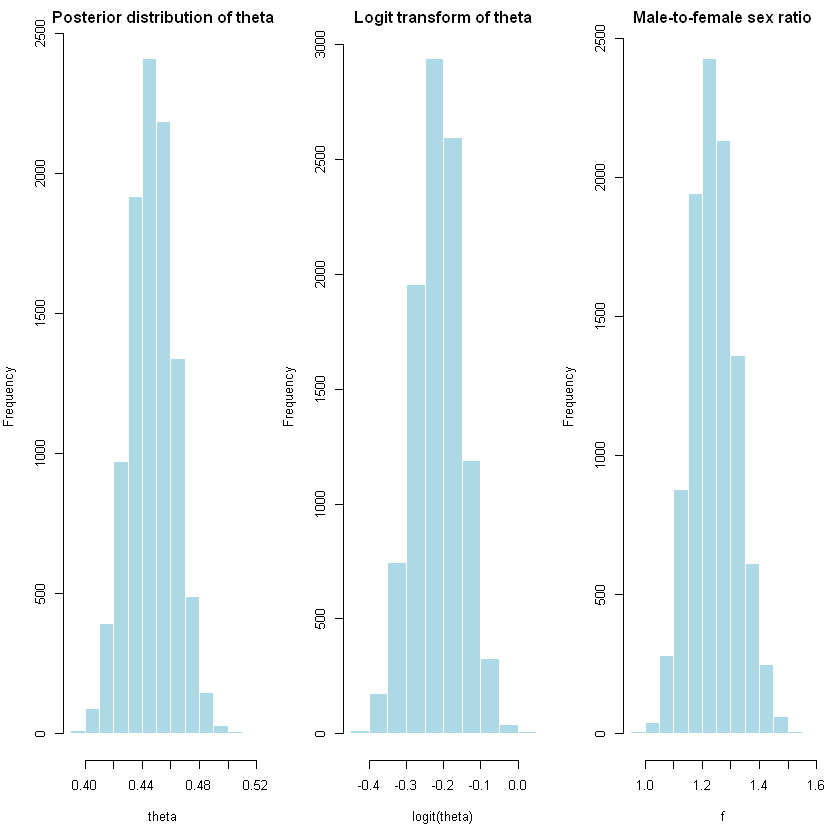

In [59]:
# Plot histograms of the posterior distributions
par(mfrow = c(1, 3), mar = c(5, 4, 2, 1))

# (a) Posterior distribution of θ
theta_samples <- rbeta(10000, results[["alpha 5 beta 5"]]$alpha_post, results[["alpha 5 beta 5"]]$beta_post)
hist(theta_samples, main = "Posterior distribution of theta", xlab = "theta", col = "lightblue", border = "white")

# (b) Logit transform of θ
logit_theta_samples <- log(theta_samples / (1 - theta_samples))
hist(logit_theta_samples, main = "Logit transform of theta", xlab = "logit(theta)", col = "lightblue", border = "white")

# (c) Male-to-female sex ratio φ = (1 − θ)/θ (f)
sex_ratio_samples <- (1 - theta_samples) / theta_samples
hist(sex_ratio_samples, main = "Male-to-female sex ratio", xlab = "f", col = "lightblue", border = "white")

In [42]:
# Initialize a dataframe to store the results
table_data <- data.frame(
  Prior_Probability = numeric(),
  Prior_Sum = numeric(),
  Posterior_Median = numeric(),
  Posterior_95CI_Lower = numeric(),
  Posterior_95CI_Upper = numeric(),
  stringsAsFactors = FALSE
)

# Define the prior alpha and beta values
prior_expt <- 0.485 # alpha/(alpha + beta)
prior_sum_values <- c(2, 5, 10, 20, 100, 200) # alpha + beta



# Compute the posterior for each combination of prior alpha and beta
for (prior_sum in prior_sum_values) {
  
  prior_alpha <- prior_expt * prior_sum
  prior_beta <- prior_sum - prior_alpha
  
  
  # Compute posterior parameters and quantities
  posterior_result <- compute_beta_posterior(prior_alpha, prior_beta, x, n)
  
  # Round posterior summaries to three significant figures
  posterior_median <- signif(posterior_result$map_estimator, digits = 3)
  posterior_lower <- signif(posterior_result$credible_interval[1], digits = 3)
  posterior_upper <- signif(posterior_result$credible_interval[2], digits = 3)
  
  # Store the results in the dataframe
  table_data <- rbind(table_data, c(prior_expt, prior_sum,
                                    posterior_median,
                                    posterior_lower, posterior_upper))
}

# Rename the columns
colnames(table_data) <- c("α/α+β", "α+β",
                          "Posterior_Median", "Posterior_95CI_Lower", "Posterior_95CI_Upper")

# Print the table
print(table_data)


  a/a+ß a+ß Posterior_Median Posterior_95CI_Lower Posterior_95CI_Upper
1 0.485   2            0.446                0.415                0.477
2 0.485   5            0.446                0.415                0.477
3 0.485  10            0.446                0.415                0.477
4 0.485  20            0.447                0.416                0.478
5 0.485 100            0.449                0.420                0.479
6 0.485 200            0.452                0.424                0.481


Here we define the `h()`:
$$
    h(t)=\left\{
    \begin{array}{lcl}
         a,        &\text{ for }  &0<t<m-c \quad\text{and } m+c<t<1,\\
         A+b\cdot t/c,  &\text{ for }  &t\in [m-c,c],\\ 
         B-b\cdot t/c   &\text{ for }  &t\in [c,m+c],\\ 
    \end{array}
    \right.\mskip80mu t \in[0,1]
$$

where $a=0.50$, $b=5.00$ is the height of the central triangle ($a+b$ is the peak ordinate), $A=a+b-(b\cdot m)/c$,
$B<-a+b+(b\cdot m)/c$.

In [45]:
m<-0.485
c<-0.100
p.tails<-0.4  
a<-0.5
b<-5.0
A<-a+b-(b*m)/c
B<-a+b+(b*m)/c
h<-function(t){return(a*(t>=0)*(t<m-c)+a*(t>m+c)*(t<=1)+(A+b*t/c)*(t>m-c)*(t<m)+(B-b*t/c)*(t>m)*(t<m+c))}

In [46]:
integral <- integrate(h, lower = 0, upper = 1)$value
print(integral)  # Should be approximately 1

# Compute expectation and variance
expectation <- integrate(function(t) t * h(t), lower = 0, upper = 1)$value
variance <- integrate(function(t) (t - expectation)^2 * h(t), lower = 0, upper = 1)$value

print(paste("Expectation:", expectation))
print(paste("Variance:", variance))

[1] 1.000001
[1] "Expectation: 0.492499873385333"
[1] "Variance: 0.0425577079797754"


The expectation of piecewise linear nonconjugate prior is 0.492499873385333 and the variance 0.0425577079797754. So, we will now solve the equation problem to find the values $\alpha_0$ and $\beta_0$ such that $\textrm{Beta}(\alpha_0,\beta_0)$ has the same expectation and variance than the piecewise linear nonconjugate prior. We will use the following equations:

$$ \text{E(U)} = \frac{a}{a + b} $$
$$ \text{var(U)} = \frac{ab}{(a + b)^2(a + b + 1)} $$



In [56]:
# Define the equations for expected value and variance
equations <- function(ab, exp, var) {
  a <- ab[1]
  b <- ab[2]
  e <- a / (a + b) - exp
  v <- a * b / ((a + b)^2 * (a + b + 1)) - var
  return(e^2 + v^2)  # We optimize the sum of squares to find the root
}

# Given values
exp_value <- expectation
var_value <- variance

# Perform optimization
result <- optim(c(0.1, 100), equations, exp = exp_value, var = var_value, method = "L-BFGS-B", lower = c(0.01, 0.01), upper = c(100, 100))

# Extract the solution
a_solution <- result$par[1]
b_solution <- result$par[2]

# Print the solution
cat("Solution:\n")
cat("a:", a_solution, "\n")
cat("b:", b_solution, "\n")


Solution:
a: 2.399999 
b: 2.473097 


So, we have that $\alpha_0 = 2.399999$ and $\beta_0 = 2.473097$ and $\textrm{Beta}(2.399999,2.473097)$

We will now show the historgrams (Figure 2.3) and the table (Table 2.1) as before.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

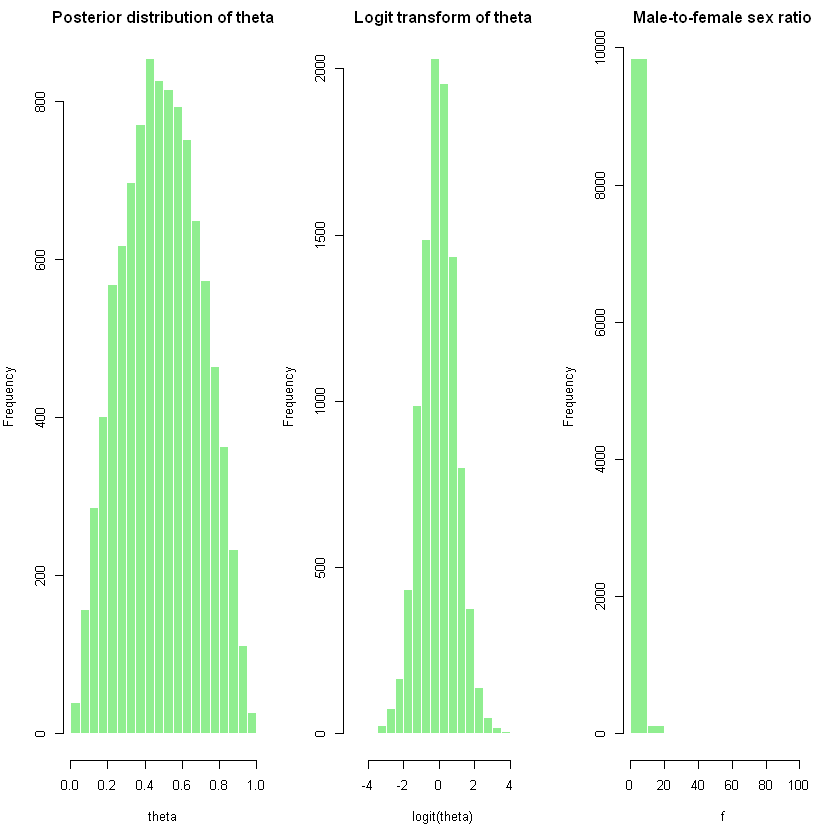

In [65]:
# Plot histograms of the posterior distributions
par(mfrow = c(1, 3), mar = c(5, 4, 2, 1))

# (a) Posterior distribution of θ
theta_samples <- rbeta(10000, a_solution, b_solution)
hist(theta_samples, main = "Posterior distribution of theta", xlab = "theta", col = "lightgreen", border = "white")

# (b) Logit transform of θ
logit_theta_samples <- log(theta_samples / (1 - theta_samples))
hist(logit_theta_samples, main = "Logit transform of theta", xlab = "logit(theta)", col = "lightgreen", border = "white")

# (c) Male-to-female sex ratio φ = (1 − θ)/θ (f)
sex_ratio_samples <- (1 - theta_samples) / theta_samples
hist(sex_ratio_samples, main = "Male-to-female sex ratio", xlab = "f", col = "lightgreen", border = "white")

In [62]:
# Initialize a dataframe to store the results
table_data <- data.frame(
  Prior_Probability = numeric(),
  Prior_Sum = numeric(),
  Posterior_Median = numeric(),
  Posterior_95CI_Lower = numeric(),
  Posterior_95CI_Upper = numeric(),
  stringsAsFactors = FALSE
)

# Compute posterior parameters and quantities
posterior_result <- compute_beta_posterior(a_solution, b_solution, x, n)

# Round posterior summaries to three significant figures
posterior_median <- signif(posterior_result$map_estimator, digits = 3)
posterior_lower <- signif(posterior_result$credible_interval[1], digits = 3)
posterior_upper <- signif(posterior_result$credible_interval[2], digits = 3)

# Store the results in the vector
vector_data <- rbind(table_data, c(prior_expt, prior_sum,
                                    posterior_median,
                                    posterior_lower, posterior_upper))


# Rename the columns
colnames(vector_data) <- c("α/α+β", "α+β",
                          "Posterior_Median", "Posterior_95CI_Lower", "Posterior_95CI_Upper")

# Print the table
print(vector_data)

  a/a+ß a+ß Posterior_Median Posterior_95CI_Lower Posterior_95CI_Upper
1 0.485 200            0.446                0.415                0.477


### Exercise 1.2

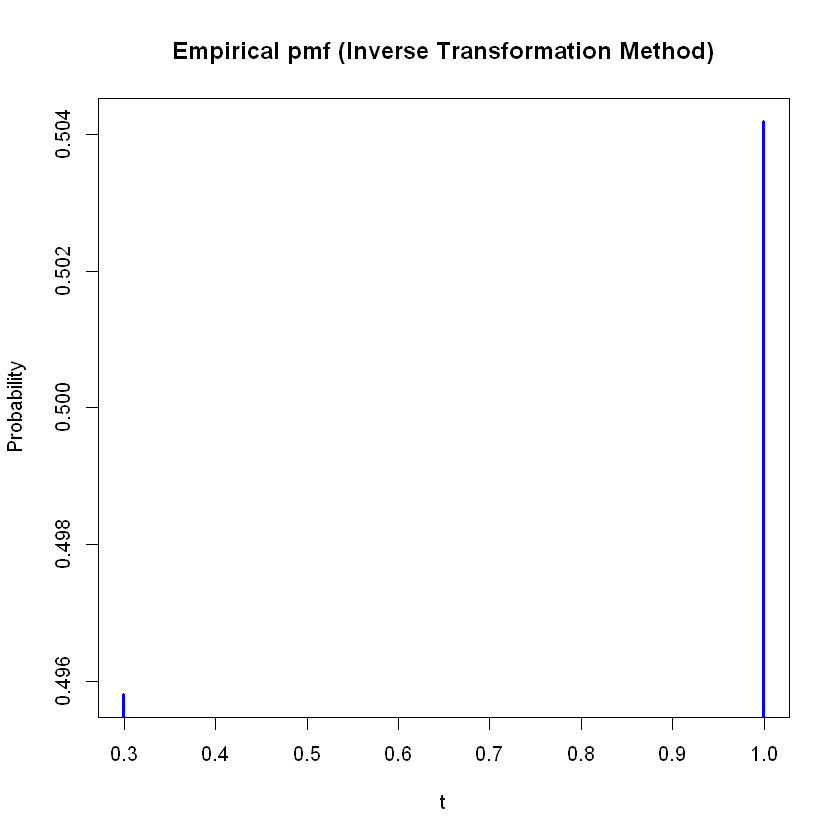

Inverse Transformation Method:
Median: 0.9999516 
Mode: 0.9999516 
Expectation: 0.6528113 
Standard Deviation: 0.3500686 

Discretization Method:
Median: 0.4864865 
Mode: 0.4764765 
Expectation: 0.4901191 
Standard Deviation: 0.2057657 


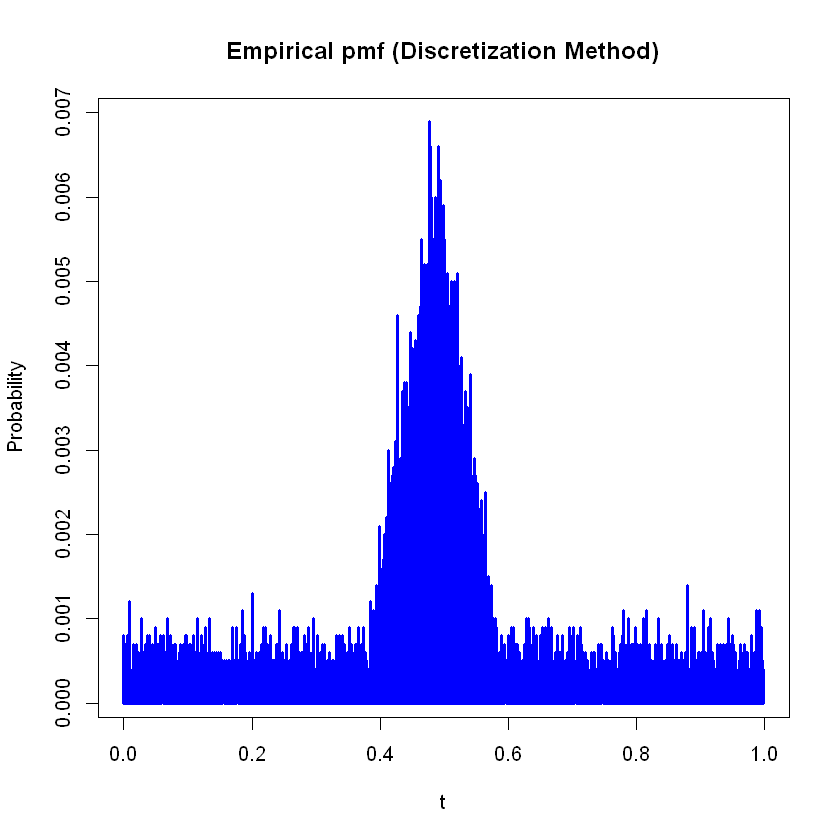

In [37]:
# set parameters for the nonconjugate piecewise linear prior
m <- 0.485
c <- 0.100
a <- 0.5
b <- 5.0
N <- 1000 # number of grid intervals
t <- seq(0, 1, length = N)
t <- t[-N] # remove last point (equal to 1: we want N intervals)

# define the piecewise linear prior function
h <- function(t) {
  A <- a + b - (b * m) / c
  B <- a + b + (b * m) / c
  return(a * (t >= 0) * (t < m - c) + a * (t > m + c) * (t <= 1) + 
           (A + b * t / c) * (t >= m - c) * (t < m) + 
           (B - b * t / c) * (t > m) * (t <= m + c))
}

# sample from h using inverse transformation method
sample_from_h_inverse <- function(n_samples) {
  u <- runif(n_samples) # generate uniform random numbers
  t_samples <- numeric(length(u))
  for (i in 1:length(u)) {
    # find the interval where the root lies
    interval <- c(0, 1)
    if (h(0) - u[i] < 0) {
      interval <- c(0, m)
    } else {
      interval <- c(m, 1)
    }
    # use optimize to find the root within the interval
    t_samples[i] <- optimize(function(t) abs(h(t) - u[i]), interval = interval)$minimum
  }
  return(t_samples)
}

# sample from the discretization of h
sample_from_h_discretization <- function(n_samples) {
  pmf <- h(t) / sum(h(t)) # normalize the pdf to obtain pmf
  t_samples <- sample(t, size = n_samples, replace = TRUE, prob = pmf)
  return(t_samples)
}

# function to compute empirical pmf
compute_empirical_pmf <- function(samples) {
  unique_samples <- sort(unique(samples))
  pmf <- numeric(length(unique_samples))
  for (i in 1:length(unique_samples)) {
    pmf[i] <- sum(samples == unique_samples[i]) / length(samples)
  }
  return(list(samples = unique_samples, pmf = pmf))
}

# simulate samples and compute empirical pmfs
n_samples <- 10000
samples_inverse <- sample_from_h_inverse(n_samples)
samples_discretization <- sample_from_h_discretization(n_samples)

empirical_pmf_inverse <- compute_empirical_pmf(samples_inverse)
empirical_pmf_discretization <- compute_empirical_pmf(samples_discretization)

# plot empirical pmfs
plot(empirical_pmf_inverse$samples, empirical_pmf_inverse$pmf, type = "h", lwd = 2.5,
     col = "blue", xlab = "t", ylab = "Probability", main = "Empirical pmf (Inverse Transformation Method)")
plot(empirical_pmf_discretization$samples, empirical_pmf_discretization$pmf, type = "h", lwd = 2.5,
     col = "blue", xlab = "t", ylab = "Probability", main = "Empirical pmf (Discretization Method)")

# compute statistics
median_inverse <- median(samples_inverse)
mode_inverse <- empirical_pmf_inverse$samples[which.max(empirical_pmf_inverse$pmf)]
expectation_inverse <- sum(empirical_pmf_inverse$samples * empirical_pmf_inverse$pmf)
std_dev_inverse <- sqrt(sum((empirical_pmf_inverse$samples - expectation_inverse)^2 * empirical_pmf_inverse$pmf))

median_discretization <- median(samples_discretization)
mode_discretization <- empirical_pmf_discretization$samples[which.max(empirical_pmf_discretization$pmf)]
expectation_discretization <- sum(empirical_pmf_discretization$samples * empirical_pmf_discretization$pmf)
std_dev_discretization <- sqrt(sum((empirical_pmf_discretization$samples - expectation_discretization)^2 * empirical_pmf_discretization$pmf))

# print statistics
cat("Inverse Transformation Method:\n")
cat("Median:", median_inverse, "\n")
cat("Mode:", mode_inverse, "\n")
cat("Expectation:", expectation_inverse, "\n")
cat("Standard Deviation:", std_dev_inverse, "\n\n")

cat("Discretization Method:\n")
cat("Median:", median_discretization, "\n")
cat("Mode:", mode_discretization, "\n")
cat("Expectation:", expectation_discretization, "\n")
cat("Standard Deviation:", std_dev_discretization, "\n")

### Exercise 1.3

Posterior Predictive pmf (Discretization Method):
Median: 0.7067067 
Mode: 0.986987 
Expectation: 0.6661626 
Standard Deviation: 0.2359237 


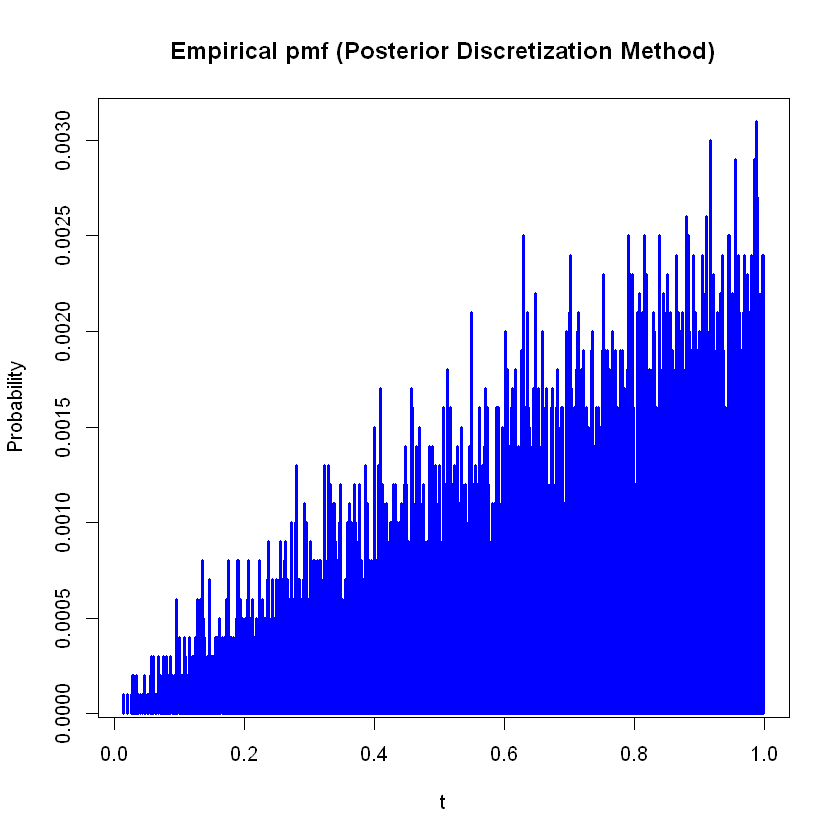

In [32]:
# define the Likelihood and LogLikelihood functions
Lik <- function(x, theta, n) {
  theta^x * (1 - theta)^(n - x)
}

LogLik <- function(x, theta, n) {
  x * log(theta) + (n - x) * log(1 - theta)
}

# define the observed data
n <- 980
x <- 437

# compute the posterior
theta_posterior <- t / sum(t) # normalized posterior

# sample from the discretization of the posterior pdf
sample_from_posterior_discretization <- function(n_samples, theta_posterior, t) {
  t_samples <- sample(t, size = n_samples, replace = TRUE, prob = theta_posterior)
  return(t_samples)
}

# simulate samples and compute empirical pmf
n_samples <- 10000
samples_posterior_discretization <- sample_from_posterior_discretization(n_samples, theta_posterior, t)
empirical_pmf_posterior_discretization <- compute_empirical_pmf(samples_posterior_discretization)

# plot empirical pmf
plot(empirical_pmf_posterior_discretization$samples, empirical_pmf_posterior_discretization$pmf, type = "h", lwd = 2.5,
     col = "blue", xlab = "t", ylab = "Probability", main = "Empirical pmf (Posterior Discretization Method)")

# compute statistics
median_posterior_discretization <- median(samples_posterior_discretization)
mode_posterior_discretization <- empirical_pmf_posterior_discretization$samples[which.max(empirical_pmf_posterior_discretization$pmf)]
expectation_posterior_discretization <- sum(empirical_pmf_posterior_discretization$samples * empirical_pmf_posterior_discretization$pmf)
std_dev_posterior_discretization <- sqrt(sum((empirical_pmf_posterior_discretization$samples - expectation_posterior_discretization)^2 * empirical_pmf_posterior_discretization$pmf))

# print statistics
cat("Posterior Predictive pmf (Discretization Method):\n")
cat("Median:", median_posterior_discretization, "\n")
cat("Mode:", mode_posterior_discretization, "\n")
cat("Expectation:", expectation_posterior_discretization, "\n")
cat("Standard Deviation:", std_dev_posterior_discretization, "\n")

## Exercise 2: Asthma mortality

This exercise pertains to `Poisson.01.pub.ipynb` (lecture 7). Review this notebook as well as the notes concerning the Poisson model and do the following:

 1. Generate a sample from the prior predictive distribution.
 
 2. Generate a sample from the posterior predictive distribution after the first experiment (with $y=3$ after one year in a population of 200,000). 

In both cases plot the simulated pmf and compare it with the theoretical one and estimate the probability of having more than 25 fatalities in the next 10 years (assuming all other conditions remain constant).

Theoretical mean of prior predictive distribution: 0.6 
Theoretical variance of prior predictive distribution: 0.12 


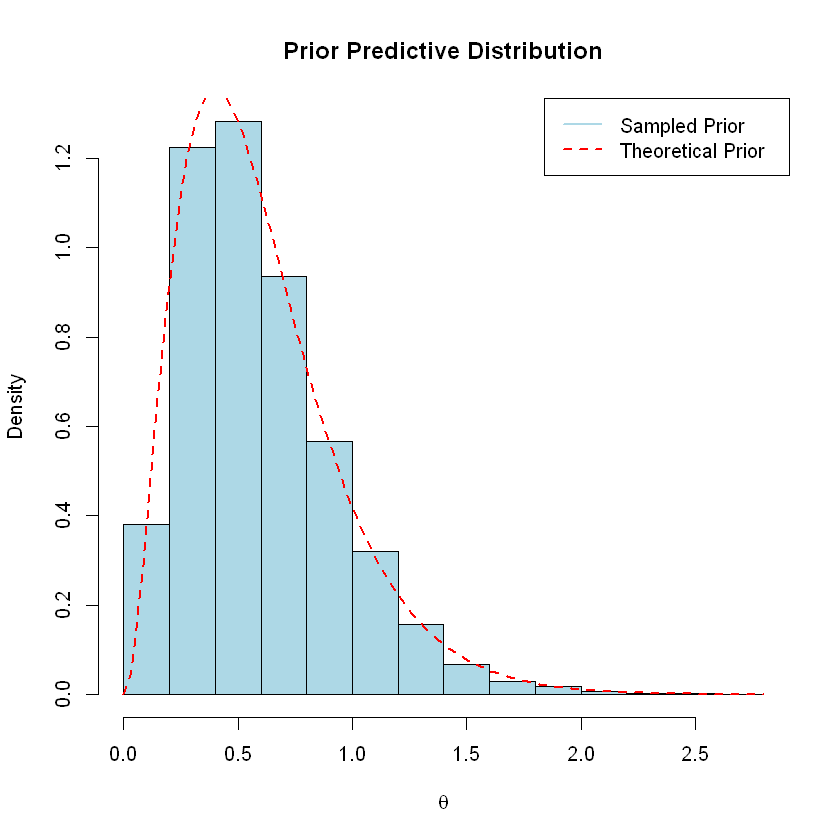

In [15]:
# set the parameters for the prior distribution
alpha <- 3
beta <- 5
N<-10000

# Generate a sample from the prior predictive distribution
prior_predictive_sample <- rgamma(N, alpha, beta)

# Plot the histogram of the prior predictive sample
hist(prior_predictive_sample, col="lightblue", freq=FALSE, 
     main="Prior Predictive Distribution", 
     xlab=expression(theta), ylab="Density")

# Plot the theoretical prior predictive distribution
curve(dgamma(x, shape = alpha, rate = beta), 
      add = TRUE, col = "red", lwd = 2, lty = 2)

# Add legend
legend("topright", legend=c("Sampled Prior", "Theoretical Prior"), 
       col=c("lightblue", "red"), lwd=2, lty=c(1,2))

# Calculate theoretical mean and variance
theoretical_mean <- alpha / beta
theoretical_variance <- alpha / beta^2

# Display theoretical mean and variance
cat("Theoretical mean of prior predictive distribution:", theoretical_mean, "\n")
cat("Theoretical variance of prior predictive distribution:", theoretical_variance, "\n")

In [21]:
# calculate the probability of more than 25 fatalities in the next 10 years for prior predictive distribution
probability_more_than_25_prior <- sum(1 - pgamma(25, shape = alpha, rate = beta)^seq(10))
cat("Probability of more than 25 fatalities in the next 10 years (prior):", probability_more_than_25_prior, "\n")

Probability of more than 25 fatalities in the next 10 years (prior): 0 


Theoretical mean of posterior predictive distribution: 2.999925e-05 
Theoretical variance of posterior predictive distribution: 1.499925e-10 


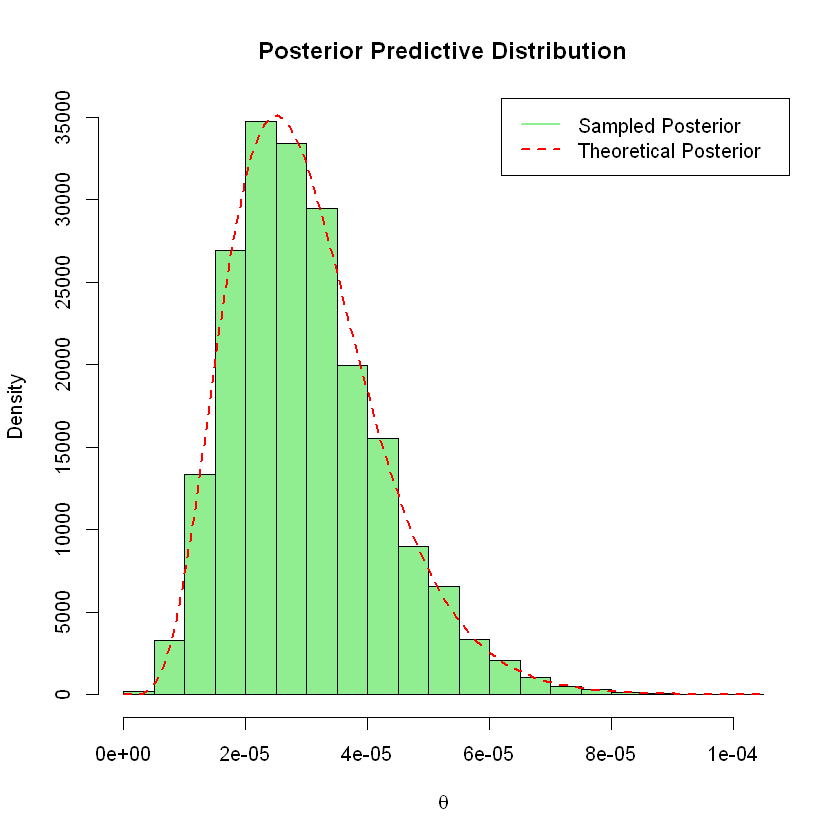

In [17]:
# define the observed data
y_observed <- 3
population_size <- 200000

# update alpha and beta based on the observed data
alpha_posterior <- alpha + y_observed
beta_posterior <- beta + population_size

# generate a sample from the posterior distribution
posterior_sample <- rgamma(N, alpha_posterior, beta_posterior)

# plot the histogram of the posterior predictive sample
hist(posterior_sample, col="lightgreen", freq=FALSE, 
     main="Posterior Predictive Distribution", 
     xlab=expression(theta), ylab="Density")

# plot the theoretical posterior predictive distribution
curve(dgamma(x, shape = alpha_posterior, rate = beta_posterior), 
      add = TRUE, col = "red", lwd = 2, lty = 2)

# add legend
legend("topright", legend=c("Sampled Posterior", "Theoretical Posterior"), 
       col=c("lightgreen", "red"), lwd=2, lty=c(1,2))

# calculate theoretical mean and variance of posterior predictive distribution
theoretical_mean_posterior <- alpha_posterior / beta_posterior
theoretical_variance_posterior <- alpha_posterior / beta_posterior^2

# display theoretical mean and variance
cat("Theoretical mean of posterior predictive distribution:", theoretical_mean_posterior, "\n")
cat("Theoretical variance of posterior predictive distribution:", theoretical_variance_posterior, "\n")


In [22]:
# calculate the probability of more than 25 fatalities in the next 10 years for posterior predictive distribution
probability_more_than_25_posterior <- sum(1 - pgamma(25, shape = alpha_posterior, rate = beta_posterior)^seq(10))
cat("Probability of more than 25 fatalities in the next 10 years (posterior):", probability_more_than_25_posterior, "\n")

Probability of more than 25 fatalities in the next 10 years (posterior): 0 
